In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
# Datasets
set = ['SPY', 'DIA', 'QQQ', 'VIXM']

sum = 0
for ticker in set:
    df = pd.read_csv(ticker+'.csv') # Define dataset
    sum += df.shape[0]
    print(f'{df.head(2)}\t{df.shape[0]} ${ticker} samples')
print(sum)

         Date      Open      High       Low    Close  Adj Close   Volume
0  1993-01-29  43.96875  43.96875  43.75000  43.9375  26.299288  1003200
1  1993-02-01  43.96875  44.25000  43.96875  44.2500  26.486324   480500	6843 $SPY samples
         Date      Open      High       Low     Close  Adj Close   Volume
0  1998-01-20  77.81250  78.84375  77.40625  78.81250  48.573048  1744600
1  1998-01-21  78.09375  78.37500  77.28125  77.84375  47.975971  1839600	5587 $DIA samples
         Date     Open       High       Low    Close  Adj Close   Volume
0  1999-03-10  51.1250  51.156250  50.28125  51.0625  44.600906  5232000
1  1999-03-11  51.4375  51.734375  50.31250  51.3125  44.819260  9688600	5301 $QQQ samples
         Date        Open        High         Low       Close   Adj Close  \
0  2011-01-04  318.480011  320.839996  318.480011  318.480011  318.480011   
1  2011-01-05  318.640015  318.640015  312.600006  313.640015  313.640015   

   Volume  
0   26800  
1    2100  	2326 $VIXM samples

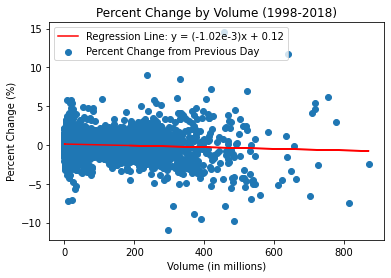

In [7]:
#Computes & Visualizes $SPY's Percent Change / Volume

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define Dataset
df = pd.read_csv("SPY.csv")

# Calculate percent change from the previous day
df['PercentChange'] = df['Close'].pct_change() * 100

# Drop NaN values resulting from the percent change calculation
df = df.dropna()

# Extracting relevant columns
X = df['Volume'].values.reshape(-1, 1) / 1e6
y = df['PercentChange']

# Create scatter plot
plt.scatter(X, y, label='Percent Change from Previous Day')

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Format the coefficient in the regression equation
coef_str = "{:0.2e}".format(model.coef_[0]).replace("e-0", "e-")
intercept_str = "{:0.2f}".format(model.intercept_)

# Equation for the regression line
equation = f"y = ({coef_str})x + {intercept_str}"

# Plot regression line with the equation in the legend
plt.plot(X, y_pred, color='red', label=f'Regression Line: {equation}')

# Customize plot
plt.title('Percent Change by Volume (1998-2018)')
plt.xlabel('Volume (in millions)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.legend(loc='upper left')
plt.show()


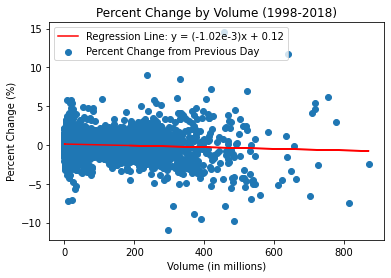

In [13]:
#Computes & Visualizes $SPY's Percent Change / Volume

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define Dataset
df = pd.read_csv("SPY.csv")

# Calculate percent change from the previous day
df['PercentChange'] = df['Close'].pct_change() * 100

# Drop NaN values resulting from the percent change calculation
df = df.dropna()

# Extracting relevant columns
X = df['Volume'].values.reshape(-1, 1) / 1e6
y = df['PercentChange']

# Create scatter plot
plt.scatter(X, y, label='Percent Change from Previous Day')

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Format the coefficient in the regression equation
coef_str = "{:0.2e}".format(model.coef_[0]).replace("e-0", "e-")
intercept_str = "{:0.2f}".format(model.intercept_)

# Equation for the regression line
equation = f"y = ({coef_str})x + {intercept_str}"

# Plot regression line with the equation in the legend
plt.plot(X, y_pred, color='red', label=f'Regression Line: {equation}')

# Customize plot
plt.title('Percent Change by Volume (1998-2018)')
plt.xlabel('Volume (in millions)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.legend(loc='upper left')
plt.show()


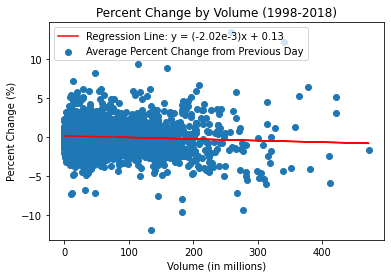

In [12]:
#Computes & Visualizes an average Percent / Volume from each Ticker in the set

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

tickers = ['SPY', 'DIA', 'QQQ']
dfs = []

for ticker in tickers:
    # Define dataset
    df = pd.read_csv(ticker+'.csv')

    # Calculate percent change from the previous day
    df['PercentChange'] = df['Close'].pct_change() * 100

    # Drop NaN values resulting from the percent change calculation
    df = df.dropna()

    # Extracting relevant columns
    df['Volume'] = df['Volume'] / 1e6
    df['Ticker'] = ticker

    dfs.append(df)

# Concatenate all dataframes
data = pd.concat(dfs)

# Group by date and calculate the mean percent change
data_grouped = data.groupby('Date').mean().reset_index()

# Extracting relevant columns
X = data_grouped['Volume'].values.reshape(-1, 1)
y = data_grouped['PercentChange']

# Create scatter plot
plt.scatter(X, y, label='Average Percent Change from Previous Day')

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


# Format the coefficient in the regression equation
coef_str = "{:0.2e}".format(model.coef_[0]).replace("e-0", "e-")
intercept_str = "{:0.2f}".format(model.intercept_)

# Equation for the regression line
equation = f"y = ({coef_str})x + {intercept_str}"

# Plot regression line with the equation in the legend
plt.plot(X, y_pred, color='red', label=f'Regression Line: {equation}')

# Customize plot
plt.title('Percent Change by Volume (1998-2018)')
plt.xlabel('Volume (in millions)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.legend(loc='upper left')
plt.show()


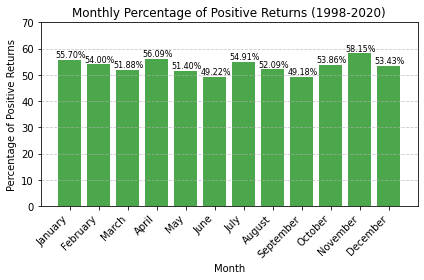

In [42]:
#Calculates & Vizualizes $SPY's porpotion of postiive returns/month 

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("SPY.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate monthly returns
df['Month'] = df['Date'].dt.month  # Extract month

# Assign 1 if the month had a positive return, 0 otherwise
df['PositiveReturn'] = (df['Close'].pct_change() > 0).astype(int)

# Group by month and calculate the percentage of positive returns
positive_returns_by_month = (df.groupby('Month')['PositiveReturn'].sum() / df.groupby('Month')['PositiveReturn'].count()) * 100

# Plot bar chart
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bars = plt.bar(months, positive_returns_by_month, color='green', alpha=0.7)

# Display the percentage above each bar
for bar, percent in zip(bars, positive_returns_by_month):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.5, bar.get_height() + 1, f'{percent:.2f}%', fontsize=8)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Monthly Percentage of Positive Returns (1998-2020)')
plt.xlabel('Month')
plt.ylabel('Percentage of Positive Returns')
plt.ylim(0, 70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


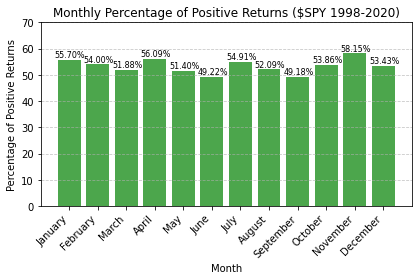

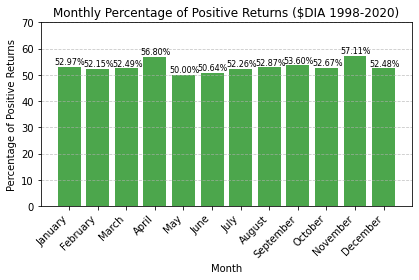

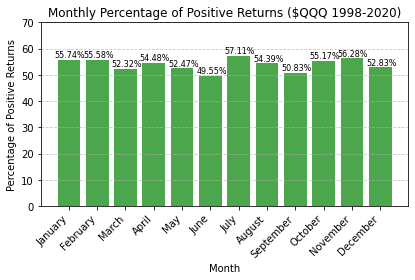

In [33]:
#Calculates & Vizualizes the porpotion of postiive returns/month of each ticker in the set

set = ['SPY', 'DIA', 'QQQ']
for ticker in set:
    
    # Define Dataset
    df = pd.read_csv(ticker+'.csv')

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate monthly returns
    df['Month'] = df['Date'].dt.month  # Extract month

    # Assign 1 if the month had a positive return, 0 otherwise
    df['PositiveReturn'] = (df['Close'].pct_change() > 0).astype(int)

    # Group by month and calculate the percentage of positive returns
    positive_returns_by_month = (df.groupby('Month')['PositiveReturn'].sum() / df.groupby('Month')['PositiveReturn'].count()) * 100

    # Plot bar chart
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    bars = plt.bar(months, positive_returns_by_month, color='green', alpha=0.7)

    # Display the percentage above each bar
    for bar, percent in zip(bars, positive_returns_by_month):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.5, bar.get_height() + 1, f'{percent:.2f}%', fontsize=8)

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    plt.title(f'Monthly Percentage of Positive Returns (${ticker} 1998-2020)')
    plt.xlabel('Month')
    plt.ylabel('Percentage of Positive Returns')
    plt.ylim(0, 70)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


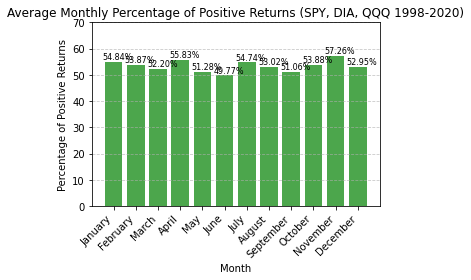

In [5]:
#Calculates & Vizualizes an average porpotion of postiive returns/month from each ticker in the set

import pandas as pd
import matplotlib.pyplot as plt

tickers = ['SPY', 'DIA', 'QQQ']
dfs = []

for ticker in tickers:
    # Define Dataset
    df = pd.read_csv(ticker+'.csv')

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate monthly returns
    df['Month'] = df['Date'].dt.month  # Extract month

    # Assign 1 if the month had a positive return, 0 otherwise
    df['PositiveReturn'] = (df['Close'].pct_change() > 0).astype(int)

    # Add ticker to dataframe
    df['Ticker'] = ticker

    dfs.append(df)

# Concatenate all dataframes
data = pd.concat(dfs)

# Group by month and calculate the average percentage of positive returns
positive_returns_by_month = (data.groupby('Month')['PositiveReturn'].sum() / data.groupby('Month')['PositiveReturn'].count()) * 100

# Plot bar chart
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bars = plt.bar(months, positive_returns_by_month, color='green', alpha=0.7)

# Display the percentage above each bar
for bar, percent in zip(bars, positive_returns_by_month):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.5, bar.get_height() + 1, f'{percent:.2f}%', fontsize=8)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Average Monthly Percentage of Positive Returns (SPY, DIA, QQQ 1998-2020)')
plt.xlabel('Month')
plt.ylabel('Percentage of Positive Returns')
plt.ylim(0, 70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


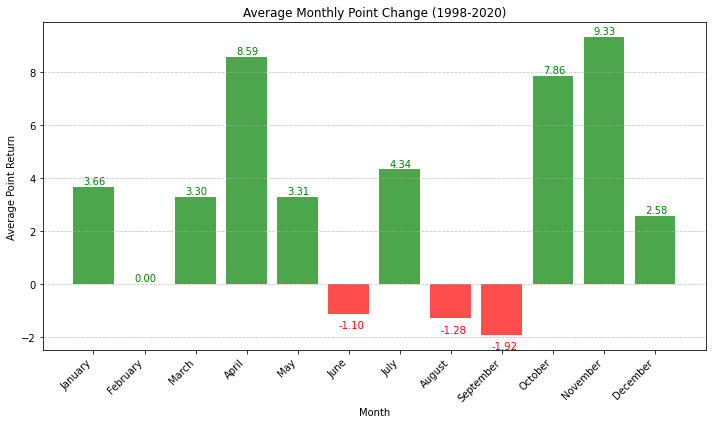

In [41]:
#Calculates & Vizualizes $SPY's average monthly point change

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("SPY.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate monthly returns
df['Month'] = df['Date'].dt.month

# Calculate average point return per month
average_returns_by_month = df.groupby('Month')['Close'].pct_change().groupby(df['Month']).mean()

# Convert average returns to points (multiply by 10,000)
average_returns_by_month *= 10000

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    x=average_returns_by_month.index,
    height=average_returns_by_month,
    color=['green' if val >= 0 else 'red' for val in average_returns_by_month],
    alpha=0.7
)

# Display the average return above each bar
for bar, point_return, month_name in zip(bars, average_returns_by_month, df['Date'].dt.month_name().unique()):
    plt.text(
        x=bar.get_x() + bar.get_width() / 2 - 0.2,
        y=(bar.get_height() + 0.1) if point_return >= 0 else (bar.get_height() - 0.55),
        s=f'{point_return:.2f}',
        fontsize=10,
        color='green' if point_return >= 0 else 'red'
    )

# Set the x-axis tick labels to month names
plt.xticks(average_returns_by_month.index, df['Date'].dt.month_name().unique(), rotation=45, ha='right')

# Add labels and title
plt.title('Average Monthly Point Change (1998-2020)')
plt.xlabel('Month')
plt.ylabel('Average Point Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

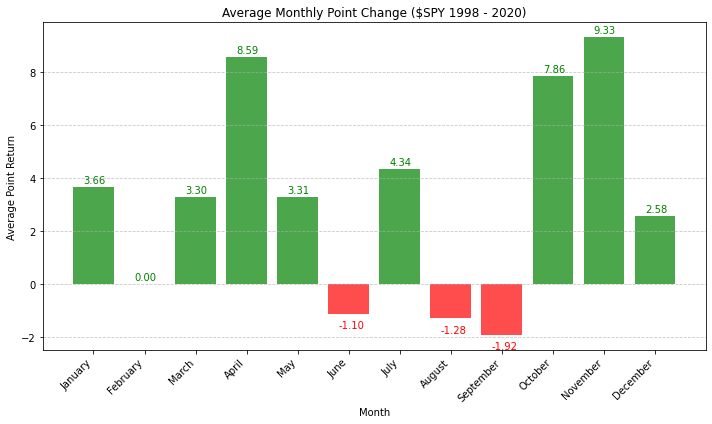

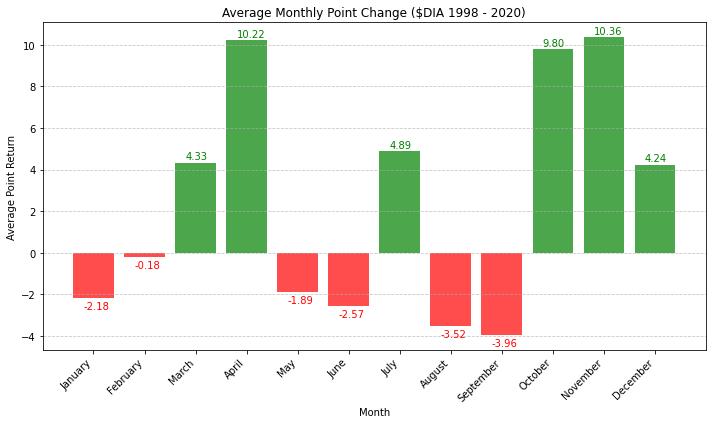

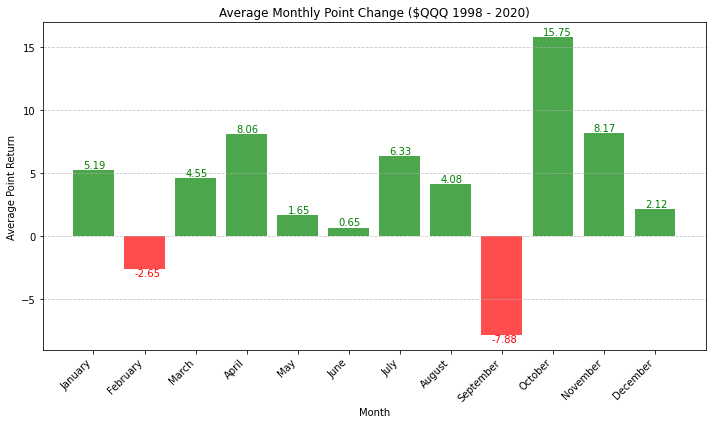

In [40]:
#Calculates & Vizualizes the average monthly point change of each ticker in the set

import pandas as pd
import matplotlib.pyplot as plt

set = ['SPY', 'DIA', 'QQQ']
for ticker in set:
    
    # Define Dataset
    df = pd.read_csv(ticker+'.csv')

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate monthly returns
    df['Month'] = df['Date'].dt.month  # Extract month

    # Calculate average point return per month
    average_returns_by_month = df.groupby('Month')['Close'].pct_change().groupby(df['Month']).mean()

    # Convert average returns to points (multiply by 10,000)
    average_returns_by_month *= 10000

    # Define the order of months
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        x=average_returns_by_month.index,
        height=average_returns_by_month,
        color=['green' if val >= 0 else 'red' for val in average_returns_by_month],
        alpha=0.7
    )

    # Display the average return above each bar
    for bar, point_return, month_name in zip(bars, average_returns_by_month, month_order):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.2,
            y=(bar.get_height() + 0.15) if point_return >= 0 else (bar.get_height() - 0.55),
            s=f'{point_return:.2f}',
            fontsize=10,
            color='green' if point_return >= 0 else 'red'
        )

    # Set the x-axis tick labels to month names in the specified order
    plt.xticks(average_returns_by_month.index, month_order, rotation=45, ha='right')

    # Add labels and title
    plt.title(f'Average Monthly Point Change (${ticker} 1998 - 2020)')
    plt.xlabel('Month')
    plt.ylabel('Average Point Return')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

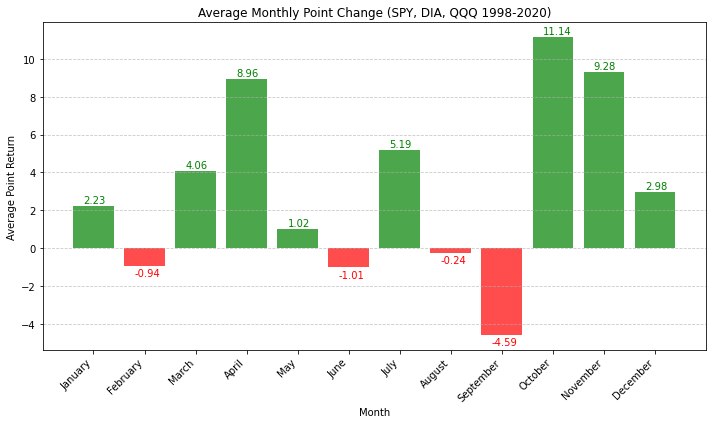

In [14]:
#Calculates & Vizualizes an average monthly point change from each ticker in the set

import pandas as pd
import matplotlib.pyplot as plt

tickers = ['SPY', 'DIA', 'QQQ']
monthly_averages = []

# Calculate average point return per month for each ticker
for ticker in tickers:
    df = pd.read_csv(ticker+'.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    average_returns_by_month = df.groupby('Month')['Close'].pct_change().groupby(df['Month']).mean()
    average_returns_by_month *= 10000  # Convert average returns to points
    monthly_averages.append(average_returns_by_month)

# Calculate the overall average for all tickers per month
overall_average = pd.concat(monthly_averages, axis=1).mean(axis=1)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot bar chart for the overall average
plt.figure(figsize=(10, 6))
bars = plt.bar(
    x=overall_average.index,
    height=overall_average,
    color=['green' if val >= 0 else 'red' for val in overall_average],
    alpha=0.7
)

# Display the average return above each bar
for bar, point_return in zip(bars, overall_average):
    plt.text(
        x=bar.get_x() + bar.get_width() / 2 - 0.2,
        y=(bar.get_height() + 0.15) if point_return >= 0 else (bar.get_height() - 0.55),
        s=f'{point_return:.2f}',
        fontsize=10,
        color='green' if point_return >= 0 else 'red'
    )

# Set the x-axis tick labels to month names in the specified order
plt.xticks(overall_average.index, month_order, rotation=45, ha='right')

# Add labels and title
plt.title('Average Monthly Point Change (SPY, DIA, QQQ 1998-2020)')
plt.xlabel('Month')
plt.ylabel('Average Point Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#Trains & Evaluates a predictive model, using volume, $VIXM percent change, and month of the year
#Predicts the percent change based on those features

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
spy = pd.read_csv('SPY.csv')
vixm = pd.read_csv('VIXM.csv')

# Calculate percent change in SPY price and VIX
spy['PercentChange'] = spy['Close'].pct_change()
vixm['PercentChange'] = vixm['Close'].pct_change()

# Merge the two dataframes on Date
data = pd.merge(spy, vixm, on='Date', suffixes=('_SPY', '_VIXM'))

# Extract month from the date
data['Month'] = pd.to_datetime(data['Date']).dt.month

# Drop rows with NaN values
data = data.dropna()

# Define features and target
features = data[['Volume_SPY', 'PercentChange_VIXM', 'Month']]
target = data['PercentChange_SPY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

In [5]:
# Save the model
model.save('actu-vs-pred_model.h5')

# Load the model
#tf.keras.models.load_model('my_model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: actu-vs-pred_model/assets


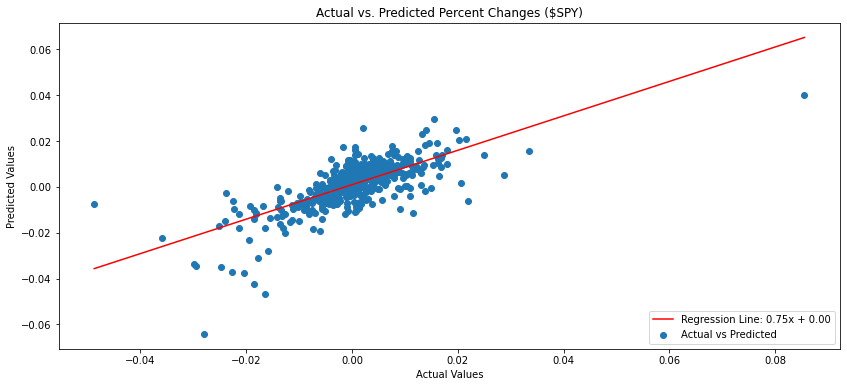

In [10]:
#Predicts & Visualizes percent changes in $SPY using the model

import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
y_pred = model.predict(X_test)

# Flatten y_pred
y_pred = y_pred.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred, label='Actual vs Predicted')

# Plot a line for perfect correlation
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(np.unique(y_test), np.poly1d(regression_line)(np.unique(y_test)), color='red', label=f'Regression Line: {regression_line[0]:.2f}x + {regression_line[1]:.2f}')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Percent Changes ($SPY)')

plt.legend(loc='lower right')
plt.show()


In [12]:
#Trains & Evaluates a predictive model, using volume, $VIXM percent change, and month of the year
#Predicts if the market will print red or green based on those features

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
spy = pd.read_csv('SPY.csv')
vixm = pd.read_csv('VIXM.csv')

# Calculate percent change in SPY price and VIX
spy['PercentChange'] = spy['Close'].pct_change()
vixm['PercentChange'] = vixm['Close'].pct_change()

# Merge the two dataframes on Date
data = pd.merge(spy, vixm, on='Date', suffixes=('_SPY', '_VIXM'))

# Extract month from the date
data['Month'] = pd.to_datetime(data['Date']).dt.month

# Drop rows with NaN values
data = data.dropna()

# Define features and target
features = data[['Volume_SPY', 'PercentChange_VIXM', 'Month']]
target = data['PercentChange_SPY']

# Convert target to binary
target = (target > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')



Train on 1488 samples, validate on 372 samples
Epoch 1/50
1488/1488 [==============================] - 2s 1ms/sample - loss: 0.5974 - accuracy: 0.7023 - val_loss: 0.5124 - val_accuracy: 0.7661
Epoch 2/50
1488/1488 [==============================] - 0s 115us/sample - loss: 0.4950 - accuracy: 0.7661 - val_loss: 0.4675 - val_accuracy: 0.7742
Epoch 3/50
1488/1488 [==============================] - 0s 104us/sample - loss: 0.4812 - accuracy: 0.7641 - val_loss: 0.4692 - val_accuracy: 0.7769
Epoch 4/50
1488/1488 [==============================] - 0s 117us/sample - loss: 0.4785 - accuracy: 0.7668 - val_loss: 0.4705 - val_accuracy: 0.7715
Epoch 5/50
1488/1488 [==============================] - 0s 99us/sample - loss: 0.4793 - accuracy: 0.7681 - val_loss: 0.4625 - val_accuracy: 0.7527
Epoch 6/50
1488/1488 [==============================] - 0s 101us/sample - loss: 0.4779 - accuracy: 0.7641 - val_loss: 0.4667 - val_accuracy: 0.7634
Epoch 7/50
1488/1488 [==============================] - 0s 105us/sam

In [347]:
# Save the model
model.save('greenred_model.h5')

# Load the model
#tf.keras.models.load_model('my_model.h5')

Defaulting to user installation because normal site-packages is not writeable
